In [1]:
import pandas as pd

# 1. Read cleaned CSVs
credit_loan = pd.read_csv("cleaned_credit_loan.csv")
application_metadata = pd.read_csv("cleaned_application_metadata.csv")
credit_history = pd.read_csv("cleaned_credit_history.csv")
demographic = pd.read_csv("cleaned_demographic.csv")
financial_ratios = pd.read_csv("cleaned_financial_ratios.csv")
geographic_data = pd.read_csv("cleaned_geographic_data.csv")

In [2]:
df_merged = credit_loan.merge(application_metadata, on='customer_id', how='left')
df_merged = df_merged.merge(credit_history, on='customer_id', how='left')
df_merged = df_merged.merge(demographic, on='customer_id', how='left')
df_merged = df_merged.merge(financial_ratios, on='customer_id', how='left')
df_merged = df_merged.merge(geographic_data, on='customer_id', how='left')

In [3]:
df_merged.head()

,customer_id,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,origination_channel,marketing_campaign,application_id,account_open_year,...,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code
0,10000,5,17700.0,36,12.50,0,2,22,620515,2013,...,0.286408,159913.1,3819.230000,13,4.8,56000,1380.0,91.0,73.0,451
1,10001,4,114000.0,180,6.83,6,0,1,624978,2015,...,3.986014,189932.2,977.260000,14,4.4,61000,1510.0,92.0,87.0,537
2,10002,6,9300.0,36,13.99,3,3,10,564658,2020,...,0.449275,31614.6,1203.120000,17,3.9,74000,1920.0,125.0,103.0,679
3,10003,5,8700.0,48,13.26,4,3,0,621493,2010,...,0.277070,17520.0,2093.436667,1,5.8,75000,1690.0,158.0,121.0,719
4,10004,5,7200.0,24,10.77,0,0,18,637785,2020,...,0.292683,31453.6,1466.420000,18,5.8,78000,1700.0,152.0,127.0,933


In [4]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 0 to 89998
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 89999 non-null  int64  
 1   loan_type                   89999 non-null  int64  
 2   loan_amount                 89999 non-null  float64
 3   loan_term                   89999 non-null  int64  
 4   interest_rate               89999 non-null  float64
 5   loan_purpose                89999 non-null  int64  
 6   origination_channel         89999 non-null  int64  
 7   marketing_campaign          89999 non-null  int64  
 8   application_id              89999 non-null  int64  
 9   account_open_year           89999 non-null  int64  
 10  account_status_code         89999 non-null  int64  
 11  num_login_sessions          89999 non-null  int64  
 12  num_customer_service_calls  89999 non-null  int64  
 13  has_mobile_app              899

In [6]:
df_merged['default'].value_counts()

0    85405
1     4594
Name: default, dtype: int64

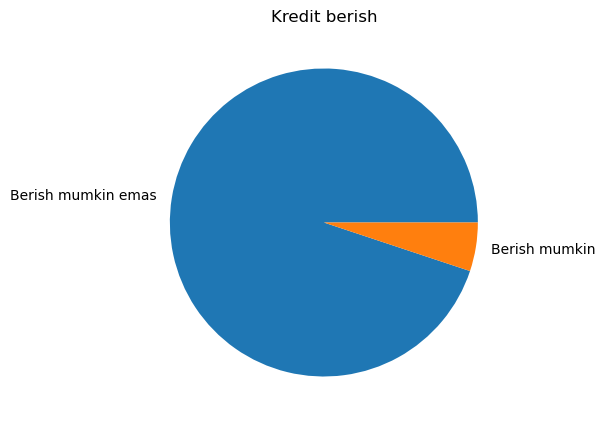

In [31]:
satisfaction_rate = df_merged['default'].value_counts()/len(df_merged)*100 
import matplotlib.pyplot as plt 
plt.figure(figsize=(5,5))
plt.title('Kredit berish')
plt.pie(satisfaction_rate,labels=['Berish mumkin emas','Berish mumkin'])
plt.show()

In [7]:
df_merged = df_merged.drop('customer_id',axis=1)

In [8]:
df_merged.head()

,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,origination_channel,marketing_campaign,application_id,account_open_year,account_status_code,...,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code
0,5,17700.0,36,12.50,0,2,22,620515,2013,2,...,0.286408,159913.1,3819.230000,13,4.8,56000,1380.0,91.0,73.0,451
1,4,114000.0,180,6.83,6,0,1,624978,2015,3,...,3.986014,189932.2,977.260000,14,4.4,61000,1510.0,92.0,87.0,537
2,6,9300.0,36,13.99,3,3,10,564658,2020,3,...,0.449275,31614.6,1203.120000,17,3.9,74000,1920.0,125.0,103.0,679
3,5,8700.0,48,13.26,4,3,0,621493,2010,0,...,0.277070,17520.0,2093.436667,1,5.8,75000,1690.0,158.0,121.0,719
4,5,7200.0,24,10.77,0,0,18,637785,2020,3,...,0.292683,31453.6,1466.420000,18,5.8,78000,1700.0,152.0,127.0,933


In [9]:
# 'default' ustunni ajratib olamiz
target = df_merged['default']
 
# qolgan ustunlar (default ustunsiz)
df_merged = df_merged.drop(columns=['default'])

# oxiriga qo'shamiz
df_merged['default'] = target

df_merged.head()


,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,origination_channel,marketing_campaign,application_id,account_open_year,account_status_code,...,total_debt_amount,monthly_free_cash_flow,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,default
0,5,17700.0,36,12.50,0,2,22,620515,2013,2,...,159913.1,3819.230000,13,4.8,56000,1380.0,91.0,73.0,451,0
1,4,114000.0,180,6.83,6,0,1,624978,2015,3,...,189932.2,977.260000,14,4.4,61000,1510.0,92.0,87.0,537,1
2,6,9300.0,36,13.99,3,3,10,564658,2020,3,...,31614.6,1203.120000,17,3.9,74000,1920.0,125.0,103.0,679,0
3,5,8700.0,48,13.26,4,3,0,621493,2010,0,...,17520.0,2093.436667,1,5.8,75000,1690.0,158.0,121.0,719,0
4,5,7200.0,24,10.77,0,0,18,637785,2020,3,...,31453.6,1466.420000,18,5.8,78000,1700.0,152.0,127.0,933,0


In [14]:

target_corr = df_merged.corr()['default'].sort_values(ascending=False)

# To'liq ko'rinishda chiqishi uchun display opsiyalar
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 500)

# Natijani chiqarish
target_corr



default                       1.000000
debt_to_income_ratio          0.215432
debt_service_ratio            0.215430
payment_to_income_ratio       0.215020
loan_to_annual_income         0.164835
monthly_payment               0.122945
loan_amount                   0.086324
total_debt_amount             0.066458
education                     0.065970
marital_status                0.060673
credit_utilization            0.059582
loan_term                     0.047907
annual_debt_payment           0.042604
total_monthly_debt_payment    0.042604
num_delinquencies_2yrs        0.039116
loan_type                     0.037190
has_mobile_app                0.031713
cost_of_living_index          0.009922
regional_unemployment_rate    0.008873
housing_price_index           0.008666
regional_median_income        0.008219
regional_median_rent          0.005669
application_id                0.003891
num_customer_service_calls    0.001610
marketing_campaign            0.001551
num_inquiries_6mo        

In [15]:
target_corr = df_merged.corr()['default'].sort_values(ascending=False)

target_corr.to_csv("default_correlations.csv", header=True)


In [ ]:
#cost_of_living_index,0.009922254488973395
#regional_unemployment_rate,0.008873384465330265
#housing_price_index,0.008665609150971183
#regional_median_income,0.00821884986254292
#regional_median_rent,0.005669248583992669
#application_id,0.003890849616876107
#num_customer_service_calls,0.0016100629030165073
#marketing_campaign,0.0015505902383486524
#num_inquiries_6mo,0.001282728939897571
#recent_inquiry_count,0.001282728939897571
#account_open_year,-5.76533567814149e-05
#account_status_code,-0.00017135131674422032
#employment_type,-0.00139367026455774
#total_debt_amount,0.06645830984860285
#education,0.06597009008717847
#marital_status,0.0606728765309366
#credit_utilization,0.0595820654366698
#loan_term,0.047906685376966594
#annual_debt_payment,0.042603600382992914
#total_monthly_debt_payment,0.042603600382992886
#num_delinquencies_2yrs,0.03911585248402659
#loan_type,0.037189861948264305
#has_mobile_app,0.031712592922017405
#previous_zip_code,-0.0017075309064712775
#state,-0.0021328429950125457
#origination_channel,-0.004697169685872138
#num_dependents,-0.015812460865185736
#interest_rate,-0.01781234467692987
#loan_purpose,-0.03623557942262766
#paperless_billing,-0.038227312113604396
#employment_length,-0.04927199655775156
#num_credit_accounts,-0.07342841726873074
#credit_usage_amount,-0.07651129656576286

In [16]:
# Past correlation ustunlari ro'yxati
low_corr_cols = [
    'cost_of_living_index',
    'regional_unemployment_rate',
    'housing_price_index',
    'regional_median_income',
    'regional_median_rent',
    'application_id',
    'num_customer_service_calls',
    'marketing_campaign',
    'num_inquiries_6mo',
    'recent_inquiry_count',
    'account_open_year',
    'account_status_code',
    'employment_type',
    'total_debt_amount',
    'education',
    'marital_status',
    'credit_utilization',
    'loan_term',
    'annual_debt_payment',
    'total_monthly_debt_payment',
    'num_delinquencies_2yrs',
    'loan_type',
    'has_mobile_app',
    'previous_zip_code',
    'state',
    'origination_channel',
    'num_dependents',
    'interest_rate',
    'loan_purpose',
    'paperless_billing',
    'employment_length',
    'num_credit_accounts',
    'credit_usage_amount'
]

# Yangi dataset yaratish
df_new = df_merged.drop(columns=low_corr_cols)


df_new.head()


,loan_amount,num_login_sessions,credit_score,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,account_diversity_index,age,annual_income,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,available_credit,loan_to_annual_income,monthly_free_cash_flow,default
0,17700.0,13,696,22.8,273.6,169100.0,0.499,41,61800.0,5150.00,738.64,592.13,0.258,0.258402,0.115,26886.9,0.286408,3819.230000,0
1,114000.0,6,659,3.5,42.0,78200.0,0.298,38,28600.0,2383.33,392.21,1013.86,0.590,0.589959,0.425,2267.8,3.986014,977.260000,1
2,9300.0,1,662,0.0,0.0,41400.0,0.174,18,20700.0,1725.00,204.07,317.81,0.303,0.302539,0.184,19085.4,0.449275,1203.120000,0
3,8700.0,4,676,9.0,108.0,60000.0,0.263,27,31400.0,2616.67,288.71,234.52,0.200,0.199961,0.090,51180.0,0.277070,2093.436667,0
4,7200.0,6,678,8.0,96.0,49700.0,0.298,26,24600.0,2050.00,248.77,334.81,0.285,0.284673,0.163,25446.4,0.292683,1466.420000,0


In [18]:
df_new.corr()['default'].sort_values(ascending=False)

default                      1.000000
debt_to_income_ratio         0.215432
debt_service_ratio           0.215430
payment_to_income_ratio      0.215020
loan_to_annual_income        0.164835
monthly_payment              0.122945
loan_amount                  0.086324
account_diversity_index     -0.082589
oldest_credit_line_age      -0.084156
oldest_account_age_months   -0.084156
existing_monthly_debt       -0.092172
num_login_sessions          -0.097556
available_credit            -0.111468
total_credit_limit          -0.113538
monthly_income              -0.140069
annual_income               -0.140071
age                         -0.140655
monthly_free_cash_flow      -0.177036
credit_score                -0.193278
Name: default, dtype: float64

array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'num_login_sessions'}>,
        <Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'oldest_credit_line_age'}>],
       [<Axes: title={'center': 'oldest_account_age_months'}>,
        <Axes: title={'center': 'total_credit_limit'}>,
        <Axes: title={'center': 'account_diversity_index'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'annual_income'}>,
        <Axes: title={'center': 'monthly_income'}>,
        <Axes: title={'center': 'existing_monthly_debt'}>,
        <Axes: title={'center': 'monthly_payment'}>],
       [<Axes: title={'center': 'debt_to_income_ratio'}>,
        <Axes: title={'center': 'debt_service_ratio'}>,
        <Axes: title={'center': 'payment_to_income_ratio'}>,
        <Axes: title={'center': 'available_credit'}>],
       [<Axes: title={'center': 'loan_to_annual_income'}>,
        <Axes: title={'center': 'monthly_free_cash_flow'}

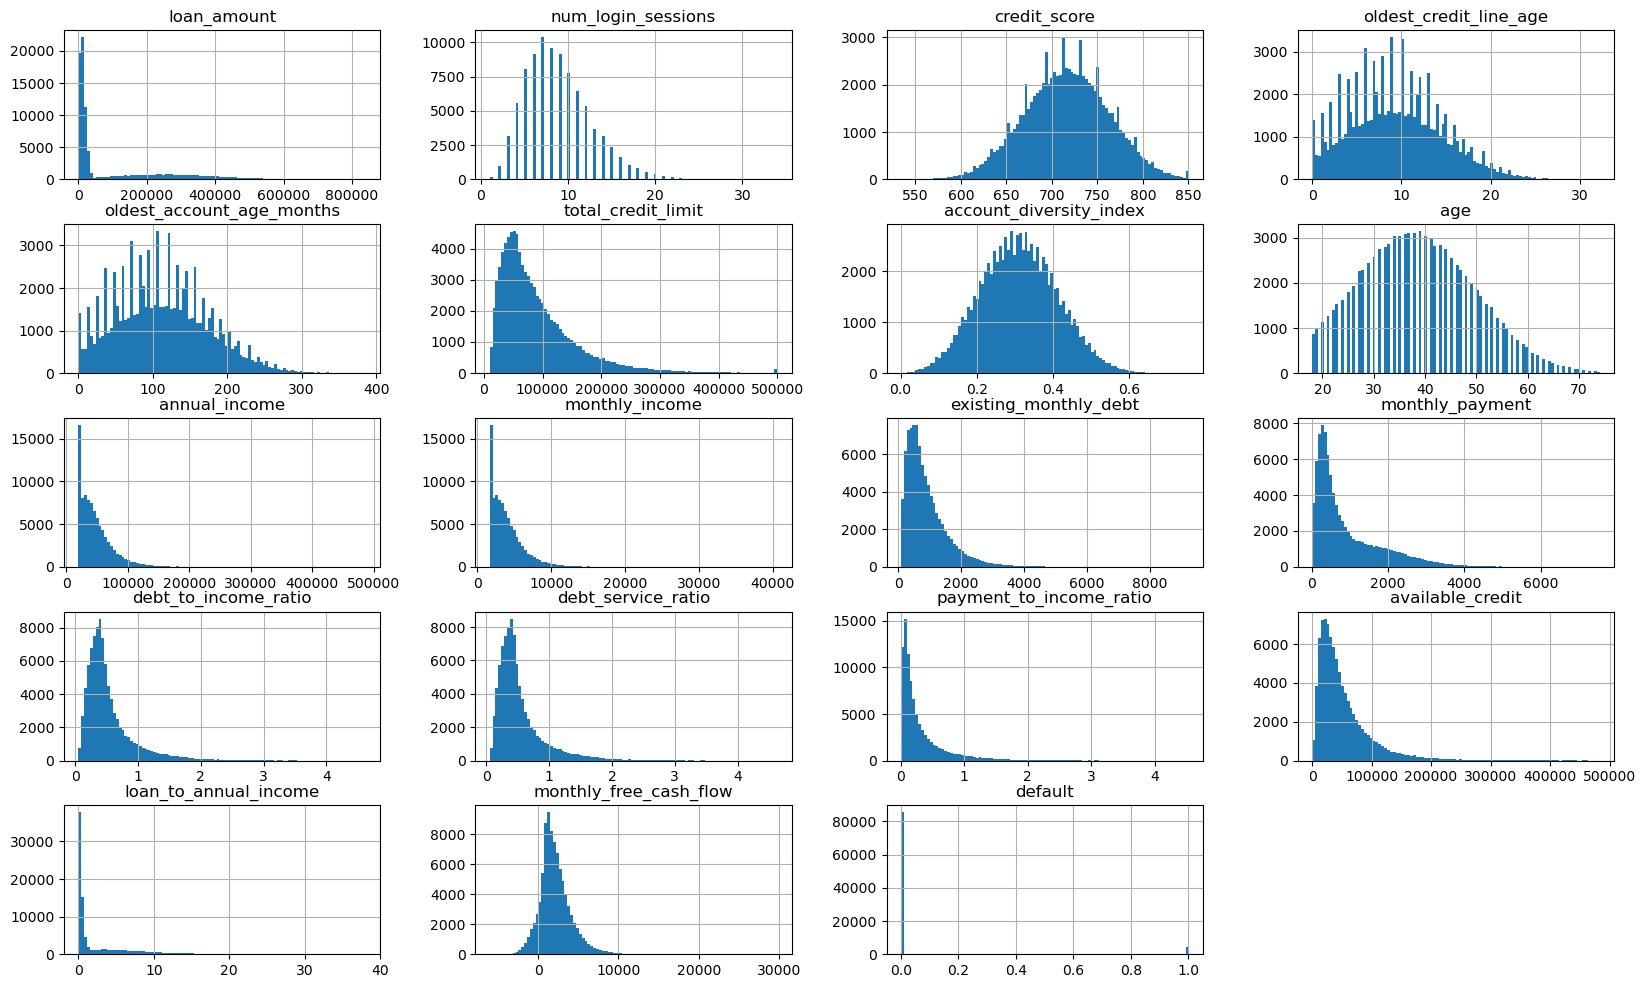

In [19]:
df_new.hist(bins=100,figsize=(20,12))

In [20]:
df_new.to_csv('final.csv')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE


In [24]:
X = df_new.drop("default", axis=1)
y = df_new["default"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)




Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


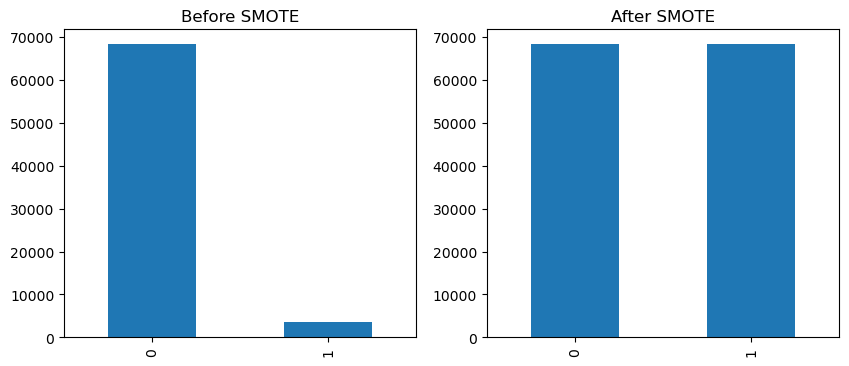

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

y_train.value_counts().plot(kind='bar', ax=ax[0], title="Before SMOTE")
y_train_res.value_counts().plot(kind='bar', ax=ax[1], title="After SMOTE")

plt.show()

In [26]:
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)


In [27]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=300),
    "RandomForest": RandomForestClassifier(n_estimators=200, class_weight='balanced'),
    "LightGBM": LGBMClassifier(
        class_weight='balanced',
        n_estimators=300
    )
}


In [28]:
results = []

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])

# DataFrame ko‘rinishida
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print(results_df)


[LightGBM] [Info] Number of positive: 68324, number of negative: 68324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4164
[LightGBM] [Info] Number of data points in the train set: 136648, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                Model  Accuracy
0  LogisticRegression  0.739333
1        RandomForest  0.891056
2            LightGBM  0.855278


In [30]:
rf = RandomForestClassifier(
    n_estimators=200, 
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train_res, y_train_res)

# Train predict
y_train_pred = rf.predict(X_test)

# Classification metrics
print("=== RandomForest Train Classification Report ===")
print(classification_report(y_test, y_train_pred))

=== RandomForest Train Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     17081
           1       0.18      0.32      0.23       919

    accuracy                           0.89     18000
   macro avg       0.57      0.62      0.58     18000
weighted avg       0.92      0.89      0.90     18000

